In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=1)
mp_drawing = mp.solutions.drawing_utils 

In [3]:

def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        # mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks


In [4]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.

    '''

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [5]:
def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: A image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label 
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.

    '''
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
        
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
            
                        
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the T pose.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                # Specify the label of the pose that is tree pose.
                label = 'T Pose'

    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the tree pose.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
        
        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 345 or right_knee_angle > 15 and right_knee_angle < 45:
            
            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'
                
    #----------------------------------------------------------------------------------------------------------------
    print(label)
    # Check if the pose is classified successfully
    # if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        # color = (0, 255, 0)  
        
    
    # Write the label on the output image. 
    # cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

In [28]:
def classifyPose1(landmarks1, landmarks2, output_image,output_image2, display=False):

     # Initialize the label of the pose. It is not known at this stage.
    label = False

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle1 = calculateAngle(landmarks1[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks1[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks1[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle1 = calculateAngle(landmarks1[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks1[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks1[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle1 = calculateAngle(landmarks1[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks1[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks1[mp_pose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle1 = calculateAngle(landmarks1[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks1[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks1[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle1 = calculateAngle(landmarks1[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks1[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks1[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle1 = calculateAngle(landmarks1[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks1[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks1[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    #----------------------------------------------------------------------------------------------------------------
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle2 = calculateAngle(landmarks2[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks2[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks2[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle2 = calculateAngle(landmarks2[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks2[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks2[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle2 = calculateAngle(landmarks2[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks2[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks2[mp_pose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle2 = calculateAngle(landmarks2[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks2[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks2[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle2 = calculateAngle(landmarks2[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks2[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks2[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle2 = calculateAngle(landmarks2[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks2[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks2[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    # #----------------------------------------------------------------------------------------------------------------
    
    # # Check if it is the warrior II pose or the T pose.
    # # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    # #----------------------------------------------------------------------------------------------------------------
    
    # # Check if the both arms are straight.
    # if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
        
    #     # Check if shoulders are at the required angle.
    #     if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
            
                        
    # #----------------------------------------------------------------------------------------------------------------
    
    # # Check if it is the T pose.
    # #----------------------------------------------------------------------------------------------------------------
    
    #         # Check if both legs are straight
    #         if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

    #             # Specify the label of the pose that is tree pose.
    #             label = 'T Pose'

    # #----------------------------------------------------------------------------------------------------------------
    
    # # Check if it is the tree pose.
    # #----------------------------------------------------------------------------------------------------------------
    
    # # Check if one leg is straight
    # if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
        
    #     # Check if the other leg is bended at the required angle.
    #     if left_knee_angle > 315 and left_knee_angle < 345 or right_knee_angle > 15 and right_knee_angle < 45:
            
    #         # Specify the label of the pose that is tree pose.
    #         label = 'Tree Pose'
                
    # #----------------------------------------------------------------------------------------------------------------
    if left_elbow_angle1 > left_elbow_angle2 - 10 and left_elbow_angle1 < left_elbow_angle2 + 10:
        if right_elbow_angle1 > right_elbow_angle2 - 10 and right_elbow_angle1 < right_elbow_angle2 + 10:
            # print(right_shoulder_angle2)
            # print(left_shoulder_angle2)
            # print(right_elbow_angle2)
            # print(left_elbow_angle2)
            # print(right_knee_angle2)
            # print(left_knee_angle2)
            # print(right_shoulder_angle1)
            # print(left_shoulder_angle1)
            # print(right_elbow_angle1)
            # print(left_elbow_angle1)
            # print(right_knee_angle1)
            # print(left_knee_angle1)
            if right_shoulder_angle1 > right_shoulder_angle2 - 10 and right_shoulder_angle1 < right_shoulder_angle2 + 10:
                # print(1)
                if left_shoulder_angle1 > left_shoulder_angle2 - 10 and left_shoulder_angle1 < left_shoulder_angle2 + 10:
                    # print(1)
                    if left_knee_angle1 > left_knee_angle2 - 10 and left_knee_angle1 < left_knee_angle2 + 10:
                        # print(1)
                        if right_knee_angle1 > right_knee_angle2 - 10 and right_knee_angle1 < right_knee_angle2 + 10:
                            # print(1)
                            label = 'True'
    
    
    # Check if the pose is classified successfully
    # if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        # color = (0, 255, 0)  
        
    
    # Write the label on the output image. 
    # cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[2,2])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image1");plt.axis('off');
    
        plt.figure(figsize=[2,2])
        plt.imshow(output_image2[:,:,::-1]);plt.title("Output Image2");plt.axis('off');
    
        return label
        
    else:
        
        # Return the output image and the classified label.
        # return output_image,output_image2, label
        return label

Match


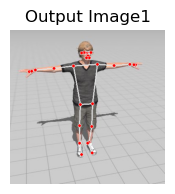

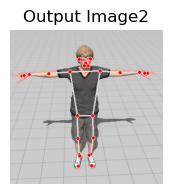

In [32]:
sample_img = cv2.imread('20.1.JPG')
sample_img1 = cv2.imread('20.3.JPG')

output_image, landmarks = detectPose(sample_img, pose, display=False)
output_image2, landmarks2 = detectPose(sample_img1, pose, display=False)
label = classifyPose1(landmarks,landmarks2 , output_image, output_image2, display=True)
# print(label)
if label == 'True':
    print("Match")
else:
    print("No Match")    
